#### Popular Open Data Repositories:
 - UC Irvine Machine Learning Repository
 - Kaggle Datasets
 - Amazon's AWS Datasets

#### Meta Portals (list open data repositories)
 - dataportals.org
 - opendatamonitor.eu
 - quandl.com

#### Other Sources
 - Wikipedia's list of Machine Learning datasets
 - Quora.com question
 - Datasets Subeddit


# CALIFORNIA HOUSING DATASET (CENSUS 1990)

In this project we use the California Housing Prices dataset from StatLib repository (1990 California Census)
First Task: Build a model of housing prices in California using the 1990 Census Data  

Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short. 
###### Objective: To build a Model which should learn from this data and be able to predict the median housing price in any district, given all the other metrics. And its output would be fed to another ML Algo alongwith many other SIGNALS which will determine whether it is beneficial to invest in a particuar area as a real estate company or not.

In [1]:
# Setup
from __future__ import division, print_function, unicode_literals
import numpy as np
import os
# To get the same outputs as th original project(Just for the sake of 
#comparison)
np.random.seed(42)

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Could have written a function to save the figures 

In [3]:
import warnings 
warnings.filterwarnings(action='ignore', message='^internal gelsd')

In [4]:
# Loading the data using pandas
import pandas as pd

In [5]:
housing = pd.read_csv('E:\Machine Learning Projects\housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Attribute Description taken from https://www.kaggle.com/harrywang/housing 
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [7]:
# Summary of the categorical variable
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# Summary of all the Numerical Attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
import seaborn as sns

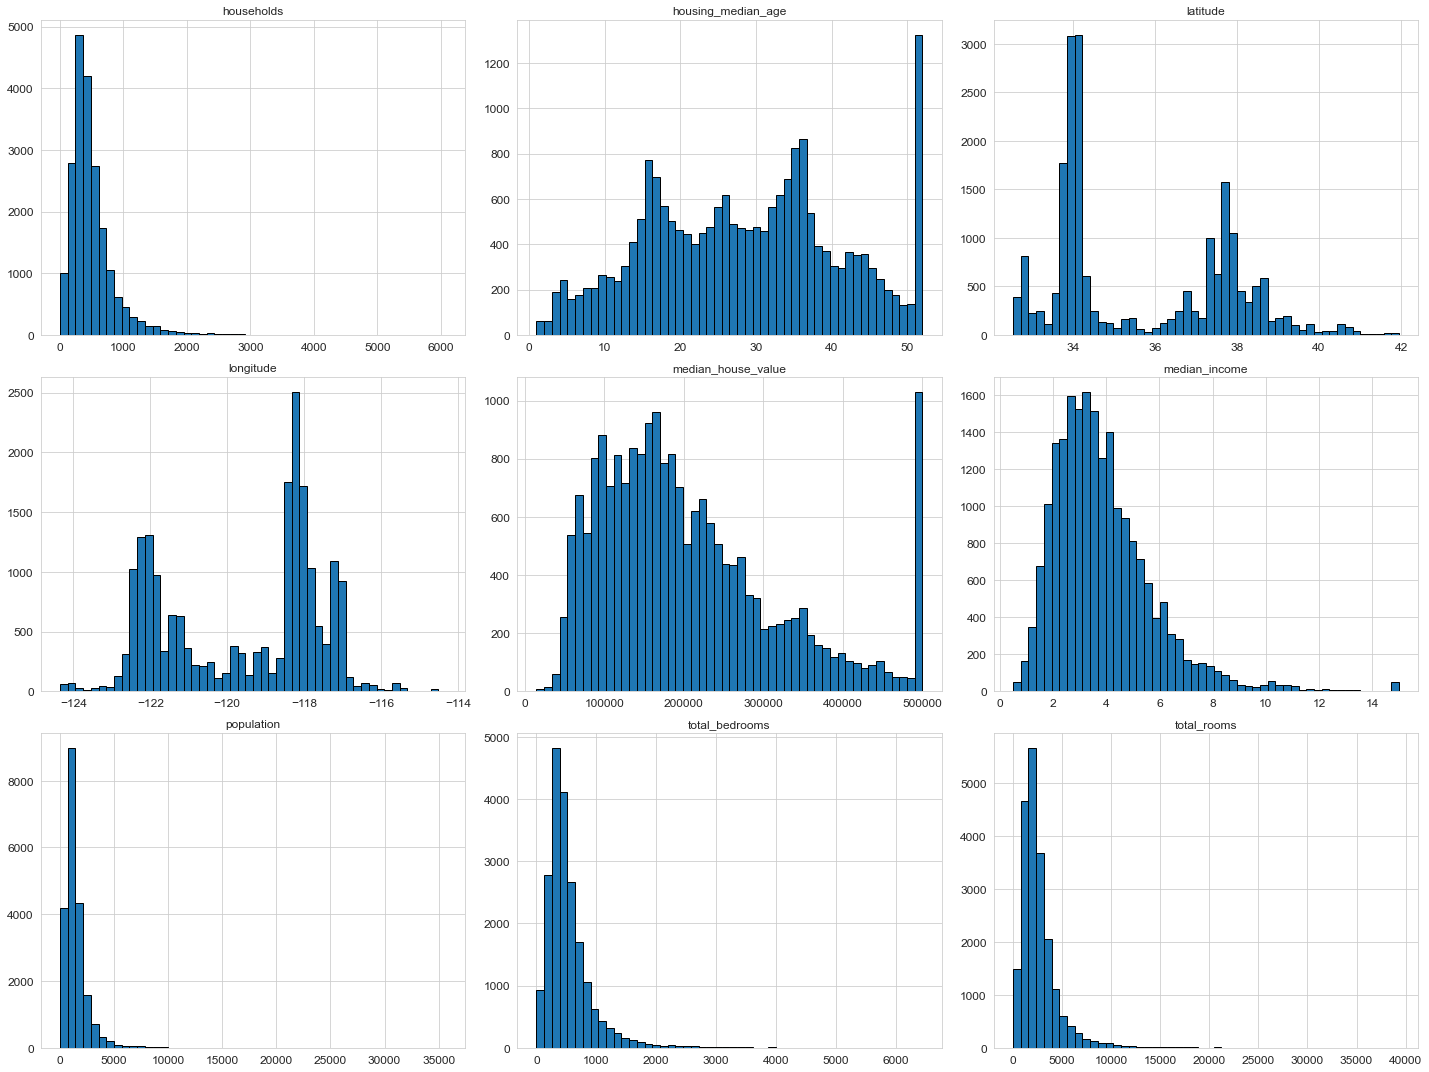

In [10]:
sns.set_style('whitegrid')
housing.hist(bins=50, figsize=(20,15), edgecolor='black')
plt.tight_layout()
plt.show()

In [11]:
# By looking at the median_income it is clear that the median incomes 
# aren't in USD that's because this data was scaled and capped at 
# 15.0001 and 0.4999 for higher and lower median incomes respectively

# The range of this scale is:

15.000100-0.499900

14.5002

#### Note: 
 - The housing_median_age, **the median_house_value** and median_income are all scaled and capped 
 - Many **histograms are tail heavy** which isn't very favourable to run a ML Algorithm so we need to transform them such that they look more bell shaped 
 
#### Now to avoid "snooping bias" we now create a test set (20% of our data set) before analysing our data set more and keep it aside

There are two ways in which we can sample our train and test sets:
 - **Random Sampling**: is ideal when there is not much information about a population or when the data is diverse and not easily grouped.
 - **Stratified Sampling**: best used when a statistical population can easily be broken down into distinctive sub-groups

In [12]:
# METHOD 1

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] 

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test") 

16512 train + 4128 test


In [13]:
# METHOD 2
# Python offers hash() method to encode the data into unrecognisable value.
# digest() : Returns the encoded data in byte format.

import hashlib

def test_set_check(identifier, test_ratio, hash):    
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):    
    ids = data[id_column]    
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))    
    return data.loc[~in_test_set], data.loc[in_test_set] 

In [14]:
housing_with_id = housing.reset_index()   # adds an `index` column 
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(len(train_set), "train +", len(test_set), "test") 

16362 train + 4278 test


### METHOD 3:  Stratified Sampling
From the following heatmap it is clear that the median_income attribute is closely related to the median_house_value attribute, therefore, We will want our test set to be representative of the various categories of income in the whole dataset

We divide this continuous numerical attribute into an income categorical attribute and then carry out a stratified sampling on these stratum
 - Note: The no. of strata should be not be very large and the size of each stratum should be sufficient enough to compute its weight accurately
 - Most of the medium_income values lie in the range 1.5 to 7 but many of them go beyond 7 

Most of the median_income(s) lie in the range 2-5 but some even go beyond 6 

should not have too many strata, and each stratum should be large enough 

creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5:

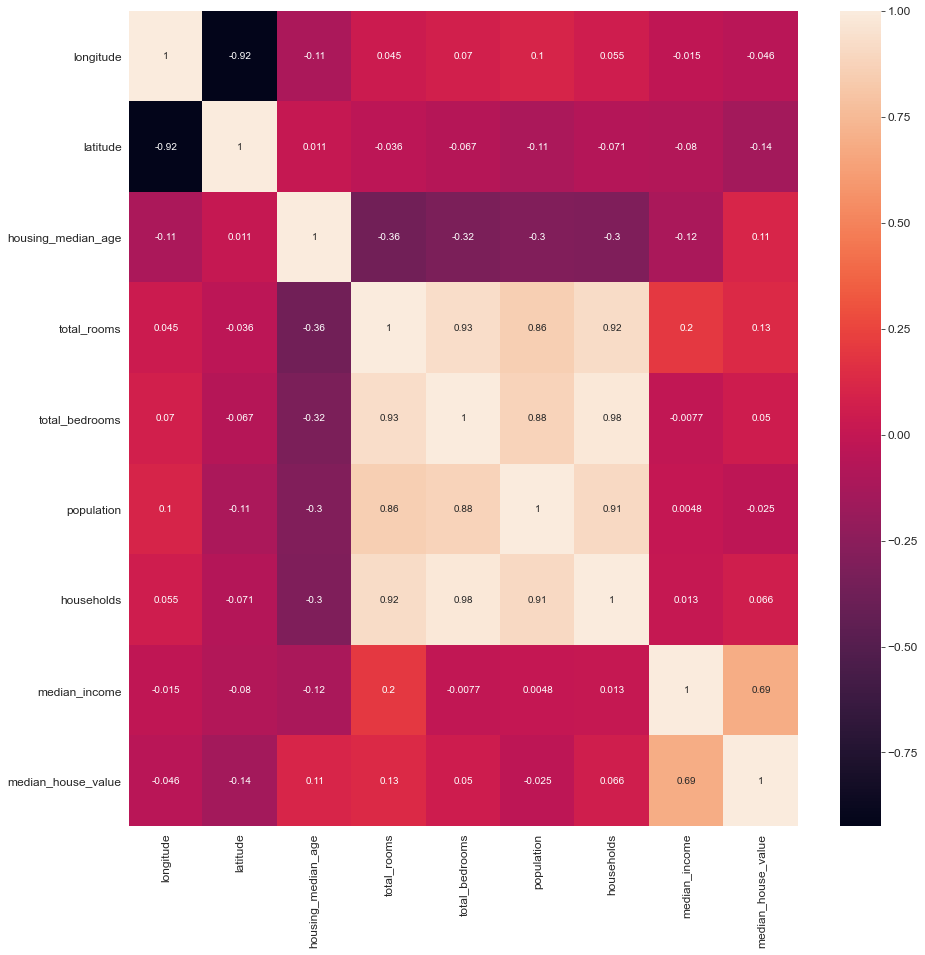

In [16]:
# CHECK FOR WHICH FEATURE HAS THE GREATES CORREATION WITH THE median_house_value
cor = housing.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)

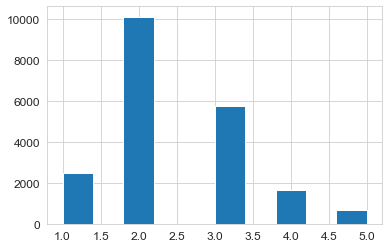

In [17]:
housing["income_cat"] = pd.cut(housing['median_income'], bins=[0., 2., 4., 6., 8., np.inf], labels=[1, 2, 3, 4 ,5])
housing["income_cat"].hist()

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2


### Using sk-learn's train_test_split function
NOTE: can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels):


In [19]:
# Same as METHOD 1 only with some additional features

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test") 

16512 train + 4128 test


### Scikit-Learn’s StratifiedShuffleSplit class:

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]):
    print('Train:', train_index, 'Test:', test_index)
    strat_train_set = housing.loc[train_index]    
    strat_test_set = housing.loc[test_index]

Train: [  249  2355 11234 ...  8907 16805 15084] Test: [ 3700 20333 19723 ...  6766 10281  4768]


In [21]:
print(len(strat_train_set), 'Train +', len(strat_test_set), 'Test')

16512 Train + 4128 Test


Thus, we observe that in both the methods, i.e. random sampling and stratified sampling we get the train and test sets of sizes 16512 and 4128 respectively

### Now, we will check which mehod produced more error from the representative sample by observing the proportion of the split as compared with the ‘income_cat’ histogram. It is observed that the data were split in accordance to the strata in the ‘income_cat’ histogram.

In [22]:
(strat_test_set['income_cat'].value_counts()/len(strat_test_set)).sort_index()

1    0.119186
2    0.489099
3    0.277374
4    0.080911
5    0.033430
Name: income_cat, dtype: float64

In [23]:
(housing['income_cat'].value_counts()/len(housing)).sort_index()

1    0.119041
2    0.489147
3    0.277374
4    0.081008
5    0.033430
Name: income_cat, dtype: float64

In [24]:
(test_set['income_cat'].value_counts()/len(test_set)).sort_index()

1    0.120882
2    0.500484
3    0.269138
4    0.076793
5    0.032703
Name: income_cat, dtype: float64

#### Sampling bias comparison of stratified versus purely random sampling

In [25]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)

train, test = train_test_split(housing, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({
    'Overall': income_cat_proportions(housing),
    'Random': income_cat_proportions(test_set),
    'Stratified': income_cat_proportions(strat_test_set)
}).sort_index()

compare_props['Rand. %Error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. %Error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [26]:
# Evalluating both approaches
compare_props

,Overall,Random,Stratified,Rand. %Error,Strat. %Error
1,0.119041,0.120882,0.119186,1.546602,0.122100
2,0.489147,0.500484,0.489099,2.317750,-0.009905
3,0.277374,0.269138,0.277374,-2.969432,0.000000
4,0.081008,0.076793,0.080911,-5.203349,-0.119617
5,0.033430,0.032703,0.033430,-2.173913,0.000000


We observe that:
 - The proportions in the Overall housing dataset are  very close (almost equal) for all the strata or categories of the income_cat attribute, to those in the test sample generated by using the Stratified sampling method, whereas the test set generated using purely random sampling method are quite skewed

Remove the income_cat attribute so that our data is back to its original state

In [27]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

# EXPORING THE DATA 
Mining and Visuaization

In [28]:
housing = strat_train_set.copy()

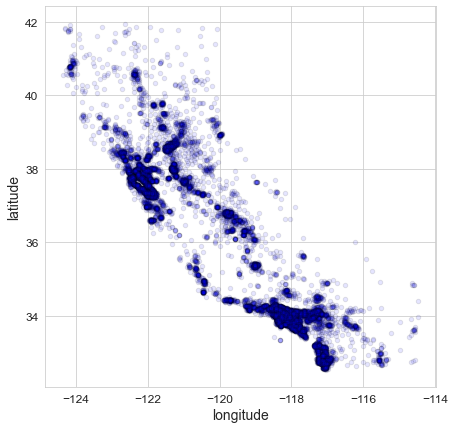

In [29]:
# GEAGRAPHICAL MAP OF ALL THE DISTRICTS highighting the high density areas
housing.plot(kind='scatter', x='longitude', y='latitude', color='blue', 
             edgecolor='black', alpha=0.1, figsize=(7,7))

OBSERVATION:
 - The above scater plot shows the map of of california with the darker regions corresponding high-density areas whih are the Bay area, around Los Angeles, San Diego, aso in the Central Valley, in particualr around Sacramento and Fresno
 
#### In the below scatter plot the size of each circle represens the district's population and its color represents the housing prices from blue (low prices) to red (high prices) 

Text(0.5, 1.0, 'CALIFORNIA HOUSING PRICES')

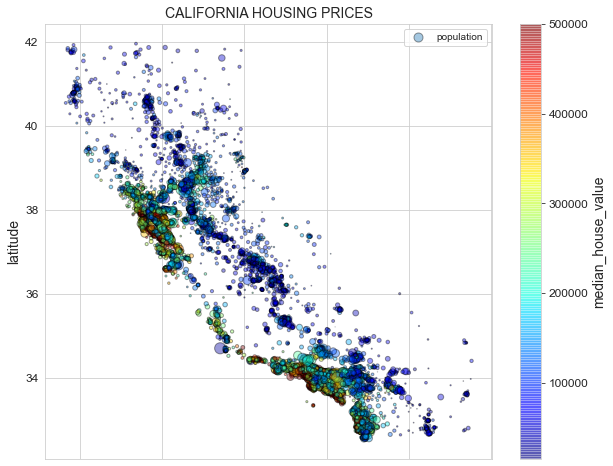

In [30]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             edgecolor='black', s=housing['population']/100,
             label='population', c='median_house_value',
            cmap=plt.get_cmap('jet'), colorbar=True, figsize=(10,8))
plt.title('CALIFORNIA HOUSING PRICES', size=14)

This plot shows that it is on the coastline and around the Bay area where most of the population resides, and also the houses in these areas are mostly in the higher price range (from the red region to the yellow region of the colormap) but this cannot be generalised sinces the coastline farther North does not show this trend.

CONCLUSION:
 - Housing Prices are related to the location and to the population density 
 - Use Clustering Algorithm to detect the main clusters
 - Introduce another feature which measures the distance from the enter of these clusters
 - Proximity to the Coastline is an important factor in determining the prices 
### LOOKING FOR CORRELATIONS (STANDARD CORRELATION COEFF. OR PEARSON' r) BETWEEN THE ATTRIBUTES AND THE MEDIAN_HOUSE_VALUE

In [31]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688863
total_rooms           0.132373
housing_median_age    0.110525
households            0.062793
total_bedrooms        0.046086
population           -0.028369
longitude            -0.045430
latitude             -0.143982
Name: median_house_value, dtype: float64

OBSERVATIONS:
 - Strong Positive correlation between median_income and median_house_value
 - Weak Positive correlation between total_rooms and median_house_values
 - Weak Positive correlation between housing_median_age and median_house_values
 - Weak negative correlation between latitute and median_house_value which implies the house prices decrease as we move further North
 - Coefficients close to zero implies Negligible "linear" correlation, 

*Note: as the standard correlation coefficients measure only the "directions" of the "linear" correlations but they are incapable of giving any information about the extent of this correlation and can't even detect Non-linear correlations*

### PANDAS SCATTER_MATRIX FUNCTION:
Attrubutes with corr coeff > 0.1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1108B970>,
      dtype=object)

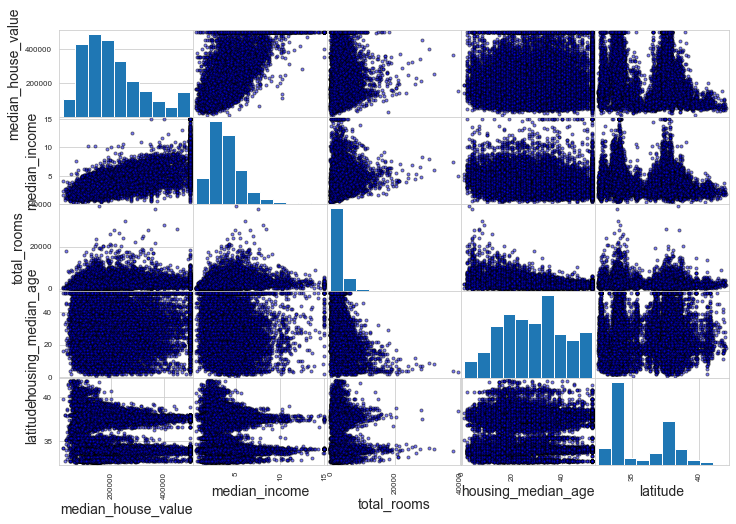

In [32]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age","latitude"] 
pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8), 
                           color='blue', edgecolor='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F10C6D0>,
      dtype=object)

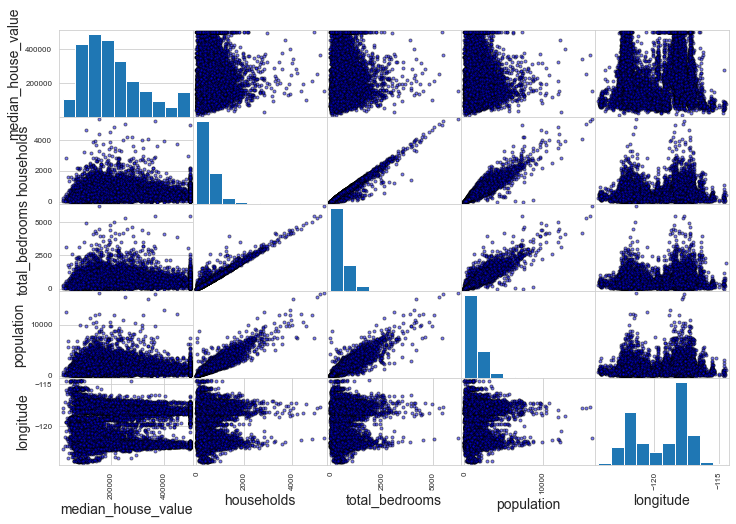

In [33]:
weak_att = ['median_house_value','households','total_bedrooms','population','longitude']
pd.plotting.scatter_matrix(housing[weak_att], figsize=(12,8), color='blue',
                          edgecolor='black')

CONCLUSION:
 - From the first scatter matrix plot:
  - The most promising attribute to predict the median_house_value is the median_income, and
  - There is a visible paern in the scatter plot of median_house_value vs the latitude which shows a significant dip at around latitute 36 deg and it attains two peaks going awya from the two values and decreses again which is explained by the scatter plot map of california since it showed us that the areas near the coastline and the Bay area are the most populated and have very high housing prices as well
 - From the second scatter plot we observe the same for the longitude with the wo peaks being around -120 deg longitude 
 - 36 deg lat and -120 deg long mark a point on the Bay area
### Scatter Plot of median_house_value and median_income

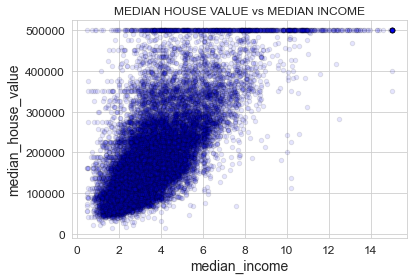

In [34]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1, title='MEDIAN HOUSE VALUE vs MEDIAN INCOME',
            color='blue', edgecolor='black')

OBSERVATIONS:
 - Corr inndeed very strong, cear upward trend without much dispersion of points
 - median_income upper cap clearly visible as a horizonta line at 500,000 USD
 - Other horizontal ines at (which we didn't anticipate earlier at 450,000 USD, 350,000 USD, 280,000 UD and a few more below that
Need to remaove the corresponding districts so that our ML Algo doesn't start identifying these trends merely due to scaling median_income 

In [35]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### EXPERIMENTING WITH ATTRIBUTE COMBINATIONS
 - total_rooms and households
  - Compute total no. of rooms per household 
 - total_bedrooms
  - Compute bedrooms per room
 - households and population
  - Compute Population per household

In [36]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] 
housing["population_per_household"]=housing["population"]/housing["households"]

#### Again look at the correlation matrix

In [37]:
cor_matrix = housing.corr()
cor_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688863
rooms_per_household         0.144402
total_rooms                 0.132373
housing_median_age          0.110525
households                  0.062793
total_bedrooms              0.046086
population_per_household   -0.022513
population                 -0.028369
longitude                  -0.045430
latitude                   -0.143982
bedrooms_per_room          -0.258878
Name: median_house_value, dtype: float64

OBSERVATION:
 - The attribute rooms_per_household has a slightly stronger coor coeff with median_house_value than the two separate attributes total_rooms and households
  - More the no. of rooms per household more is the price of the house
 - bedrooms_per_room has stronger negative correlation with median_house_value than total_bedrooms and 
  - Lesser the bedroom/room ratio more is the price of the house

*NOTE: This round is an iterative process we can find new combinations between the attributes and improve on our input to the Algo by forming new relations*

### DATA PREPARATION 
Before feeding it to the ML Algorithm
 - Clean up the quirks in the data 
 - Some attributes have a heavy-tailed distribution (transform them, e.g. by computing their kogarithm)
 
**Step 1**: Separate out predictors and target values from a clean copied train_set
 - Since we don't necessarily want to apply the same transformations to both the predictors and target variable

In [38]:
housing = strat_train_set.drop('median_house_value', axis=1) # copy created
housing_labels = strat_train_set['median_house_value'].copy()

#### DEALING WITH MISSING VALUES dropna(), drop() or fillna()

In [39]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        167
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

#### sklearn's Imputer class to automate the process of imputing the missing values of the dynamicay incoming new data as well as hose of the training set

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [41]:
# Since the median can be computed for only the numerical and ordinal 
# attributes therefore we need to remove the ordinal arttribute 
# 'ocean_proximity'

housing_num = housing.drop('ocean_proximity', axis=1)
# DataFrame of only the numerical attributes 

In [42]:
imputer.fit(housing_num)
imputer.statistics_               # statistics_  is an instance variable

array([-118.5   ,   34.26  ,   29.    , 2134.5   ,  436.    , 1170.5   ,
        410.    ,    3.5417])

In [43]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2134.5   ,  436.    , 1170.5   ,
        410.    ,    3.5417])

Safer to apply the SimpleImputer funtion to all the attributes because we never know which attribute may have missing values in te new data when the system goes live

In [44]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [45]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### HANDLING TEXT AND CATEGORICAL ATRIBUTES
CONVERT TEXT LABELS TO NUMBERS (ENCODING OF CATEGORICAL VARIABES)

In [46]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 1, 0, ..., 0, 4, 0])

In [47]:
# TO CHECK THE MAPPING OF THE ENCODER

print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Thus, 
 - <1H OCEAN'    (0)
 - 'INLAND'      (1)    
 - 'ISLAND'      (2)
 - 'NEAR BAY'    (3)
 - 'NEAR OCEAN'  (4)
 
ML Algorithm assumes that the vaues that are nearby are more reated to each other but 0 and 4 are more related than 0 and 1
To sove this we use 'one-hot encoding method'
#### Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors. 

In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### A SciPy sparse matrix : useful when you have categorical attributes with thousands of categories. After onehot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for one 1 per row.

##### Only stores the locations of non-zero elements to save memory

In [49]:
# Convert the SciPy sparse matrix to a dense one dimensional NumPy array

housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [50]:
housing_cat.head()

249        NEAR BAY
2355         INLAND
11234     <1H OCEAN
14455    NEAR OCEAN
19071     <1H OCEAN
Name: ocean_proximity, dtype: object

In [51]:
# Binary encoding for each category of the categorical attribute directy 
# from the text labels returns a dense NumPy array by default
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]], dtype=int32)

In [52]:
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]], dtype=int32)

## FEATURE SCALING
Note:
 - that scaling the target values is generally not required. There are two common ways to get all attributes to have the same scale: min-max scaling (Normalization) and standardization. 
 -  Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. 
 
**WHEN TO SCALE?

 - Rule of thumb I follow here is any algorithm that computes distance or assumes normality, scale your features!!!**


### CUSTOM TRANSFORMERS 

 - To extend Scikit-learn code to make your experiments easier to maintain and reproduce
 - **One rule of thumb of scikit-learn's project is that user code should not be tied to scikit-learn — which is a library, and not a framework. This makes it easy to extend scikit functionalities to suit our needs.**
 - Scikit-learn has many out-of-the-box transformers and predictors, but we often need to transform data in different ways. Building custom transformers using the transformer interface makes our code maintainable and we can also use the new transformer with other scikit objects like Pipeline and RandomSearchCV or GridSearchCV.
 - Stateless transformers treat samples independently while stateful transformations depend on the previous data.
 - If we need a stateful transformer "save the state on fit() method". 
 - Both stateless and stateful transformers should return self.
 
Reference: https://www.kdnuggets.com/2019/10/extend-scikit-learn-bring-sanity-machine-learning-workflow.html

## TRANSFORMATION PIPELINES
Scikit-Learn provides the **Pipeline class** to help with sequences of transformations which need to  be executed in a specific order

In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time). 

#### Let's create a custom transformer to add extra attributes:

In [53]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [55]:
housing_extra_attribs

array([[-122.22, 37.78, 44.0, ..., 'NEAR BAY', 3.38989898989899,
        3.4343434343434343],
       [-119.68, 36.77, 21.0, ..., 'INLAND', 6.146341463414634,
        2.84390243902439],
       [-117.96, 33.8, 30.0, ..., '<1H OCEAN', 5.244604316546763,
        3.5107913669064748],
       ...,
       [-118.47, 34.03, 29.0, ..., '<1H OCEAN', 3.993924665856622,
        1.850546780072904],
       [-122.41, 37.66, 32.0, ..., 'NEAR OCEAN', 3.923512747875354,
        3.104815864022663],
       [-116.96, 32.8, 25.0, ..., '<1H OCEAN', 4.610512129380054,
        2.265498652291105]], dtype=object)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [57]:
housing_num_tr

array([[-1.32209788,  1.00503914,  1.22629464, ..., -0.78228271,
         0.03080831,  1.38855846],
       [-0.05421396,  0.53188408, -0.60140225, ...,  0.26759291,
        -0.02075356, -1.04265477],
       [ 0.8043531 , -0.85947287,  0.11378349, ..., -0.07586133,
         0.03748433, -0.51316777],
       ...,
       [ 0.54977798, -0.75172469,  0.0343184 , ..., -0.55222102,
        -0.10750103,  0.81801638],
       [-1.41693959,  0.94882269,  0.27271365, ..., -0.57903955,
         0.00203142,  0.64844738],
       [ 1.30351999, -1.32794322, -0.28354192, ..., -0.31737478,
        -0.07126423,  0.31332138]])

In [58]:
from sklearn.compose import ColumnTransformer

In [59]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [60]:
housing_prepared

array([[-1.32209788,  1.00503914,  1.22629464, ...,  0.        ,
         1.        ,  0.        ],
       [-0.05421396,  0.53188408, -0.60140225, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8043531 , -0.85947287,  0.11378349, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54977798, -0.75172469,  0.0343184 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.41693959,  0.94882269,  0.27271365, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.30351999, -1.32794322, -0.28354192, ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
housing_prepared.shape

(16512, 16)

At kast our problem is framed!
## SELECT AND TRAIN A MODEL
let's first train a linear regresion model:

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

It's done. We now have a working linear regression model!

Let’s try it out on a few instances from the training set:

In [63]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [169824. 217504. 244864. 278464. 291744.]


In [64]:
print("Labels:", list(some_labels))

Labels: [131900.0, 150800.0, 195200.0, 500000.0, 332300.0]


In [65]:
# Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67853.88389794718

In [69]:
print('housing_labels range from: %f to %f' %(housing_labels.min(),housing_labels.max()))

housing_labels range from: 14999.000000 to 500001.000000


In [70]:
len(housing_labels)

16512

In [71]:
housing_labels.max() - housing_labels.min()

485002.0

In [73]:
# We further try to improve the accuracy of this model as follows:
# Our model underfits the training data
# Which implies:
# Either the features aren't sufficient to predict the target value 
# Or the model is not that powerful

# We first try a more power model called a DecisionTreeRegressor which is 
# Capable of detecting complex non-linear relationships in our data

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor() 
tree_reg.fit(housing_prepared, housing_labels) 

#Now that the model is trained, let’s evaluate it on the training set:

housing_predictions = tree_reg.predict(housing_prepared) 

In [74]:
tree_mse = mean_squared_error(housing_labels, housing_predictions) 
tree_rmse = np.sqrt(tree_mse) 
tree_rmse 

0.0

Now, our model has just badly overfit the data, which shows exactly how powerful a model the DecisioTreeRegressor is

## BETTER EVALUATION USING CROSS VALIDATION

In [75]:
# The following code performs K-fold Cross-validation for the 
# DecisionTreeRegressor model 
# The scoring function for this Model is a utiity function instead of a cost
# function like in case of RMSE compued in Linear Regression Model

from sklearn.model_selection import cross_val_score 

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-scores)  
# again gives the cost function (just for the sake of comparison with rmse 
# scores of the Linear Regression model)

In [79]:
# Let us now look at the results:
def display_scores(scores): 
        print("Scores:", scores) 
        print("Mean:", scores.mean()) 
        print("Standard deviation:", scores.std()) 
display_scores(rmse_scores)

Scores: [70472.4123992  69468.44593185 66490.88057071 70833.95819005
 71656.12495727 73289.63563834 72022.85173513 70090.47238909
 69128.74699235 71717.86919932]
Mean: 70517.13980033033
Standard deviation: 1794.8681342984898


Now, the Decision tree regressor model doesn't look as good as esrlier. It even seems performs worse that the Linear Regression model.

**Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). But cross-validation comes at the cost of training the model several times, so it is not always possible.**

Thus, the Decision Tree Regessor has a score of 70,517.14 approx, generaly + or - 1794.87 approx 

In [80]:
# Let’s compute the same scores for the Linear Regression model just to be sure:

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10) 
lin_rmse_scores = np.sqrt(-lin_scores) 
display_scores(lin_rmse_scores) 

Scores: [68696.66286324 67844.33352153 67346.49781984 66903.4331687
 66534.48921935 68608.91527097 69545.77494712 68205.87566798
 70002.96393867 67146.11172877]
Mean: 68083.50581461677
Standard deviation: 1084.4656405031587


That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

#### Let’s try one last model now: the RandomForestRegressor:
 Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further. 

In [82]:
# Training the model on the Training set

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
#Now that the model is trained, let’s evaluate it on the training set:

housing_predictions = forest_reg.predict(housing_prepared) 

In [86]:
# Computing the RMSE for this model

forest_mse = mean_squared_error(housing_labels, housing_predictions) 
forest_rmse = np.sqrt(forest_mse) 
forest_rmse 

18494.94348209219

In [87]:
# Let’s compute the Cross-vaidation scores for the Random Forest Regressor
# model just to be sure:

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10) 
forest_rmse_scores = np.sqrt(-forest_scores) 
display_scores(forest_rmse_scores) 

Scores: [49922.87351259 46656.3367901  49774.69818919 47858.57104924
 50506.33823859 50442.79143196 50953.10694231 49905.52018899
 50457.76213371 49749.09160266]
Mean: 49622.70900793278
Standard deviation: 1266.5429019036833


The scores on the Random forest model are much better than the previous two models, hence, Random Forest Regressor looks very promising!

However, notice that the RMSE score on the training set is still much lower than that on the Validation sets, which implies that the model is still overfitting the training set

Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

Without spending too much time tweaking the hyperparameters, the goal is to shortlist a few (two to five) promising models.

## FINE TUNING THE SHORTLISTED MODELS
### GRID SEARCH
All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation